In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn import linear_model
pd.options.mode.chained_assignment = None
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sl
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score


# Dosyanın okunması / Read the file

In [46]:
df = pd.read_csv('twitch_game_data.csv',encoding='cp1252')

# df yi inceleme / Look the dataframe 

In [47]:
df.head(6)

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.290000
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.620000
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.260000
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.290000
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.030000
5,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.880000


In [48]:
df.shape

(14200, 12)

In [49]:
df.dtypes

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_Streamed       object
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object

# Saat değerlerinin son 6 rakamını silme / Deleting last 6 numbers of hour instances

In [50]:
i=0
for item in df["Hours_Streamed"]:
    df["Hours_Streamed"].iloc[i] = np.int64(df["Hours_Streamed"].iloc[i][:-6])
    i+=1

In [52]:
df.mean()

C:\Users\Elif\AppData\Local\Temp\ipykernel_1488\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Rank                   100.500000
Month                    6.422535
Year                  2018.464789
Hours_watched      4730352.399577
Hours_Streamed      155623.847606
Peak_viewers         54487.469648
Peak_channels          577.256972
Streamers            17119.756690
Avg_viewers           6485.326408
Avg_channels           212.900915
Avg_viewer_ratio        82.292956
dtype: float64

In [53]:
df.tail(5)

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
14195,196,War Thunder,11,2021,645300,71128,6286,215,6374,897,98,9.070000
14196,197,Dofus,11,2021,645248,20979,6319,71,1273,897,29,30.760000
14197,198,Monster Hunter: World,11,2021,635375,69110,5487,169,6686,883,96,9.190000
14198,199,Gas Station Simulator,11,2021,617396,8015,26865,38,1716,858,11,77.030000
14199,200,Knight Online,11,2021,607581,23773,3361,89,1152,845,33,25.560000


In [54]:
df.shape

(14200, 12)

# null veriyi silme / Delete null value

In [58]:
df.isnull().sum()

Rank                0
Game                0
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [59]:
df.dropna(inplace = True)

In [60]:
df.isnull().sum()

Rank                0
Game                0
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

# Görselleştirme / Visualization


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,14199.000000,100.495669,57.736064,1.000000,50.500000,100.000000,150.000000,200.000000
Month,14199.000000,6.422847,3.413607,1.000000,3.000000,6.000000,9.000000,12.000000
Year,14199.000000,2018.464751,1.693772,2016.000000,2017.000000,2018.000000,2020.000000,2021.000000
Hours_watched,14199.000000,4730663.153955,16531982.222792,89811.000000,363514.500000,809434.000000,2268004.500000,344551979.000000
Peak_viewers,14199.000000,54489.129516,131725.254457,441.000000,8272.500000,19950.000000,45444.000000,3123208.000000
Peak_channels,14199.000000,576.888865,2631.148026,1.000000,51.000000,121.000000,315.000000,129860.000000
Streamers,14199.000000,17119.430030,54465.625079,0.000000,1461.000000,4088.000000,10651.000000,1013029.000000
Avg_viewers,14199.000000,6485.749842,22670.546870,120.000000,498.000000,1110.000000,3104.500000,479209.000000
Avg_channels,14199.000000,212.907881,742.668106,0.000000,16.000000,42.000000,120.000000,13789.000000
Avg_viewer_ratio,14199.000000,82.298461,371.322250,1.980000,16.100000,29.150000,57.820000,13601.870000


In [65]:
pd.set_option('float_format', '{:f}'.format)

In [66]:
df.describe()

,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000
mean,100.495669,6.422847,2018.464751,4730663.153955,54489.129516,576.888865,17119.430030,6485.749842,212.907881,82.298461
std,57.736064,3.413607,1.693772,16531982.222792,131725.254457,2631.148026,54465.625079,22670.546870,742.668106,371.322250
min,1.000000,1.000000,2016.000000,89811.000000,441.000000,1.000000,0.000000,120.000000,0.000000,1.980000
25%,50.500000,3.000000,2017.000000,363514.500000,8272.500000,51.000000,1461.000000,498.000000,16.000000,16.100000
50%,100.000000,6.000000,2018.000000,809434.000000,19950.000000,121.000000,4088.000000,1110.000000,42.000000,29.150000
75%,150.000000,9.000000,2020.000000,2268004.500000,45444.000000,315.000000,10651.000000,3104.500000,120.000000,57.820000
max,200.000000,12.000000,2021.000000,344551979.000000,3123208.000000,129860.000000,1013029.000000,479209.000000,13789.000000,13601.870000


C:\Users\Elif\AppData\Local\Temp\ipykernel_1488\2946790896.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = df.groupby(["Year"]).sum()


<AxesSubplot: xlabel='Year'>

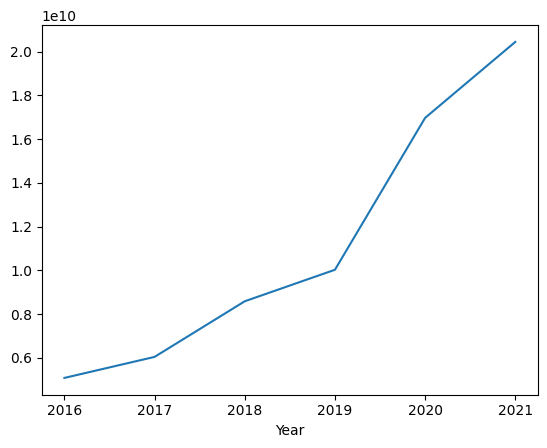

In [67]:
a = df.groupby(["Year"]).sum()
a["Hours_watched"].plot()

C:\Users\Elif\AppData\Local\Temp\ipykernel_1488\2564359332.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b= df.groupby(["Month"]).mean()


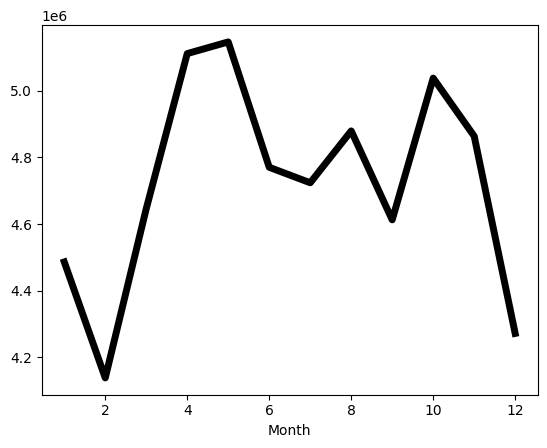

In [68]:
b= df.groupby(["Month"]).mean()
plt=b["Hours_watched"].plot(color="black" ,linewidth=5)


C:\Users\Elif\AppData\Local\Temp\ipykernel_1488\1971705019.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b= df.groupby(["Month"]).mean()


<AxesSubplot: xlabel='Month'>

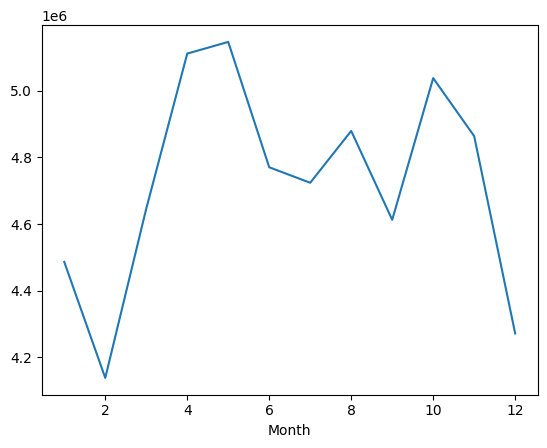

In [69]:
b= df.groupby(["Month"]).mean()
b["Hours_watched"].plot()

In [70]:
df["Game"].count()

14199

In [71]:
df["Game"].nunique()

1784

In [73]:
df[(df.Game == "Just Chatting")]["Game"].count()

39

C:\Users\Elif\AppData\Local\Temp\ipykernel_1488\3379659077.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dff=pd.DataFrame(df.groupby(["Game"]).mean())


<AxesSubplot: xlabel='Game'>

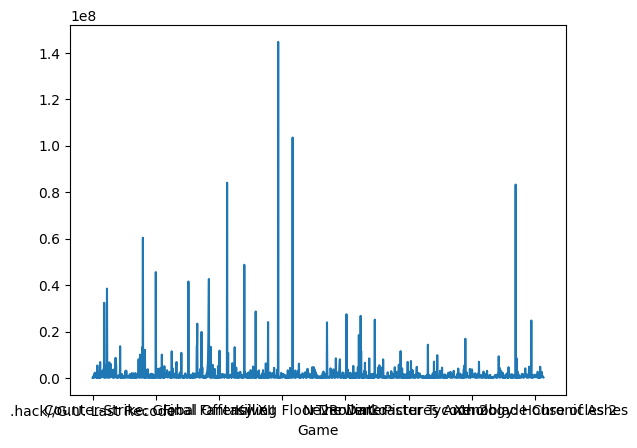

In [74]:
dff=pd.DataFrame(df.groupby(["Game"]).mean())
dff["Hours_watched"].plot()


In [77]:
df[(df.Game == "7 Days to Die")]["Game"].count()

71

In [86]:
train,test = train_test_split(df, test_size=0.25)

In [87]:
train.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
7405,6,Counter-Strike: Global Offensive,2,2019,47256109,744851,524985,2575,120461,70426,1110,63.440000
8680,81,Dicey Dungeons,8,2019,898898,8639,36793,44,1796,1209,11,104.050000
4837,38,Dark Souls III,1,2018,2405618,126343,202405,302,20584,3237,170,19.040000
2755,156,Naruto Shippuden: Ultimate Ninja Storm 4,2,2017,199102,12397,19689,77,4036,296,18,16.060000
2871,72,Diablo III,3,2017,604830,50869,14851,1031,6745,814,68,11.890000


In [88]:
train.shape

(10649, 12)

In [89]:
test.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
2848,49,Blackwake,3,2017,1091990,19923,38978,117,3852,1469,26,54.810000
11962,163,Conqueror's Blade,12,2020,797975,30474,47589,101,1815,1073,41,26.190000
3704,105,Bloodborne,7,2017,447184,34436,5038,92,6250,601,46,12.990000
11297,98,ARK: Survival Evolved,9,2020,1422325,201038,5353,482,13425,1978,279,7.070000
1580,181,Planet Coaster,8,2016,125993,2057,33236,35,315,169,2,61.250000


In [90]:
test.shape

(3550, 12)

reg=linear_model.LinearRegression(normalize=True)
reg.fit(train[["Streamers"]],train[["Hours_watched"]])

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(train[["Streamers"]])

reg = linear_model.LinearRegression()
reg.fit(scaled_train, train[["Hours_watched"]])


LinearRegression()

In [92]:
reg.predict(test[["Streamers"]])

C:\Users\Elif\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  delattr(self, "feature_names_in_")


array([[4.92619454e+10],
       [2.32139685e+10],
       [7.99261812e+10],
       ...,
       [1.41446464e+11],
       [1.19234714e+11],
       [2.79069521e+10]])

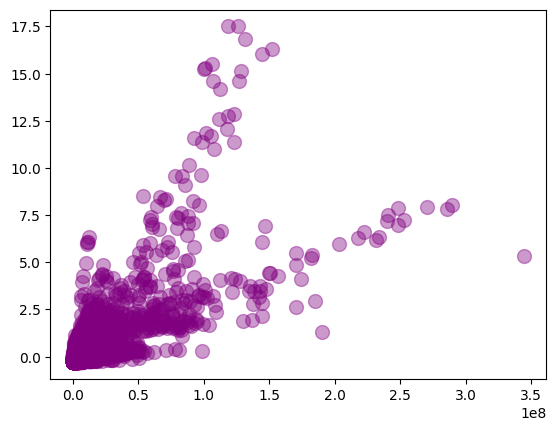

In [97]:
import matplotlib.pyplot as plt

plt.scatter(x=train[["Hours_watched"]], y=scaled_train, c="purple", alpha=0.4, s=100)
plt.show()

In [98]:
df.corr()

C:\Users\Elif\AppData\Local\Temp\ipykernel_1488\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
Rank,1.000000,0.000097,-0.000024,-0.390575,-0.349157,-0.262927,-0.366517,-0.390540,-0.356438,0.069142
Month,0.000097,1.000000,-0.033942,0.003300,0.001239,0.014806,-0.002439,0.001591,-0.000169,-0.037627
Year,-0.000024,-0.033942,1.000000,0.145643,0.153407,0.124118,0.137188,0.145824,0.162934,-0.062422
Hours_watched,-0.390575,0.003300,0.145643,1.000000,0.714579,0.525957,0.752494,0.999618,0.759460,-0.017882
Peak_viewers,-0.349157,0.001239,0.153407,0.714579,1.000000,0.532727,0.568395,0.713820,0.564185,0.058868
Peak_channels,-0.262927,0.014806,0.124118,0.525957,0.532727,1.000000,0.746240,0.526377,0.784443,-0.028872
Streamers,-0.366517,-0.002439,0.137188,0.752494,0.568395,0.746240,1.000000,0.752319,0.961246,-0.043858
Avg_viewers,-0.390540,0.001591,0.145824,0.999618,0.713820,0.526377,0.752319,1.000000,0.759666,-0.017910
Avg_channels,-0.356438,-0.000169,0.162934,0.759460,0.564185,0.784443,0.961246,0.759666,1.000000,-0.040135
Avg_viewer_ratio,0.069142,-0.037627,-0.062422,-0.017882,0.058868,-0.028872,-0.043858,-0.017910,-0.040135,1.000000


In [99]:
y = df.iloc[:,8:9]
y

,Streamers
0,129172
1,120849
2,44074
3,36170
4,214054
...,...
14195,6374
14196,1273
14197,6686
14198,1716


In [102]:
X = df.iloc[:,4:5]
X

,Hours_watched
0,94377226
1,47832863
2,45185893
3,39936159
4,16153057
...,...
14195,645300
14196,645248
14197,635375
14198,617396


TypeError: expected 1D vector for x

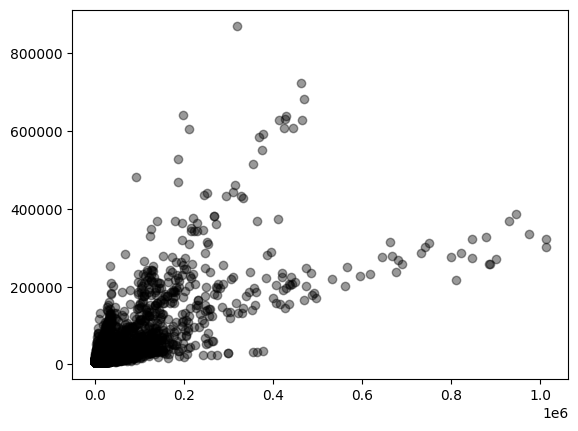

In [101]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

y = df.iloc[:,8:9]
X = df.iloc[:,4:5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
plt.scatter(x=y_train, y=y_pred_train, c="black", alpha=0.4)

a = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(a)
plt.plot(y_test,p(y_test),"red")
plt.xlabel('Correct Value')
plt.ylabel('Prediction')
plt.show()

In [103]:
X=df[["Hours_watched"]]

X.head()

,Hours_watched
0,94377226
1,47832863
2,45185893
3,39936159
4,16153057


In [104]:
y=df["Streamers"]
y

0        129172
1        120849
2         44074
3         36170
4        214054
          ...  
14195      6374
14196      1273
14197      6686
14198      1716
14199      1152
Name: Streamers, Length: 14199, dtype: int64

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [106]:
X_train.shape

(11359, 1)

In [107]:
y_train.shape

(11359,)

In [108]:
linreg=LinearRegression().fit(X_train,y_train)
linreg.coef_

array([0.00259158])

In [109]:
linreg.intercept_

5084.469413547191

In [110]:
linreg.coef_

array([0.00259158])

In [111]:
linreg.score(X_train,y_train)


0.5749985188148989

In [112]:
linreg.score(X_test,y_test)

0.5210192722324177

In [113]:
#Overfitting yok ama underfitting var ? https://youtu.be/gFzq_oz_mSQ

In [114]:
X=df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [115]:
X_train.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
10541,142,Call of Duty: Black Ops 4,5,2020,937302,200433,10165,453,16929,1261,269,4.680000
10801,2,League of Legends,7,2020,135123272,3248650,494759,7246,223201,181861,4372,41.590000
13534,135,Call of Duty: Mobile,8,2021,1277121,194883,56900,550,17250,1718,262,6.550000
937,138,Mario Kart 8,5,2016,155186,4675,6258,28,1064,208,6,33.190000
2195,196,RPG Maker,11,2016,110345,1131,7584,9,168,153,1,97.560000


In [116]:
X_train.dtypes

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_Streamed       object
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object

In [117]:
Y= df.iloc[:,8:9].values.reshape(-1,1)#Streamers
X = df.iloc[:,4:5].values.reshape(-1,1)#Hours_watched

In [118]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

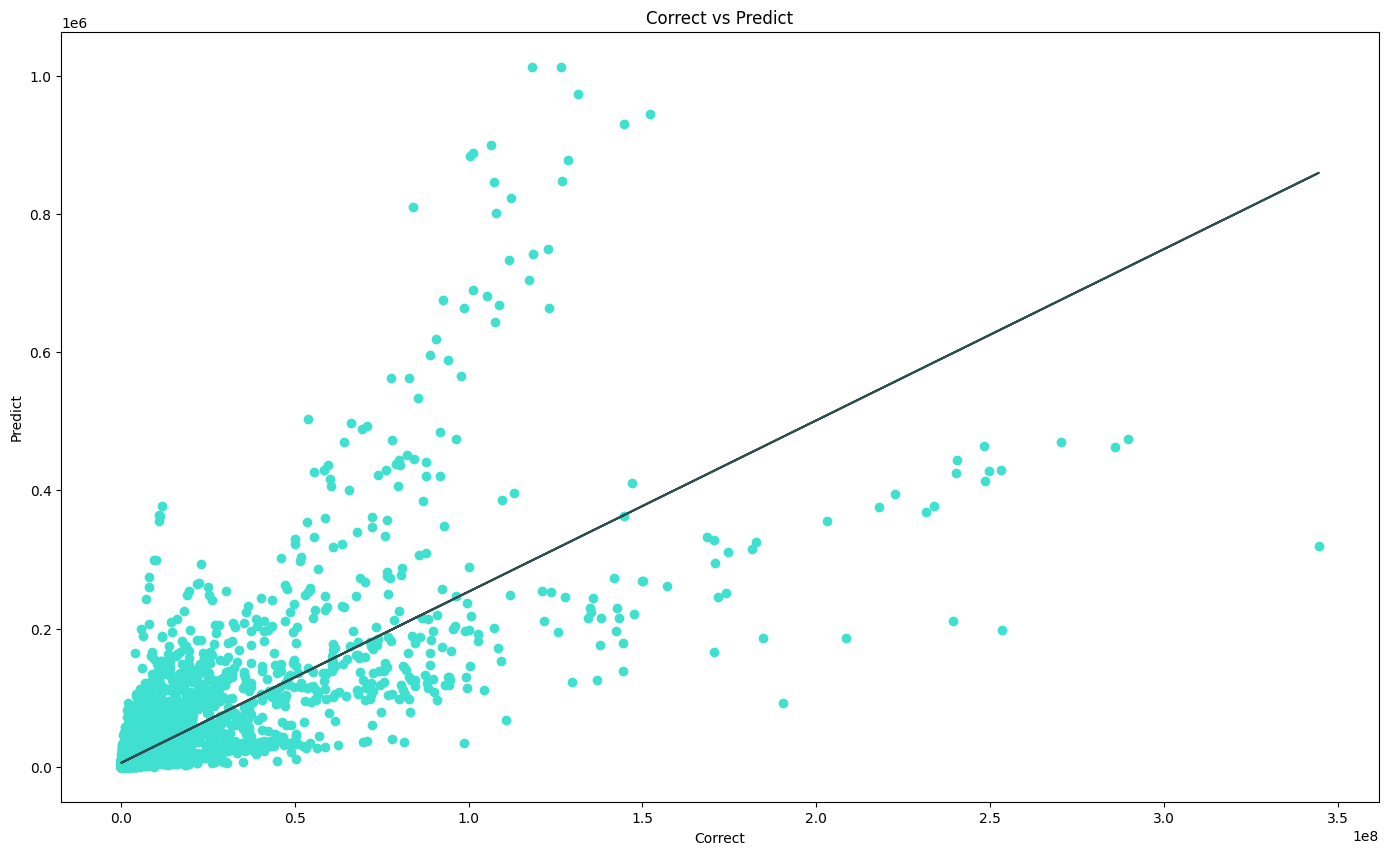

In [119]:
fig = plt.figure(figsize=(17,10))

plt.scatter(X, Y, color="turquoise")
plt.plot(X, Y_pred, color='darkslategray')
plt.title('Correct vs Predict')
plt.xlabel('Correct')
plt.ylabel('Predict')
plt.show()